# EPL Striker Clustering

### Load Dataset & Import Library

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [ ]:
! kaggle datasets download -d rishikeshkanabar/premier-league-player-statistics-updated-daily

  0% 0.00/34.4k [00:00<?, ?B/s]
100% 34.4k/34.4k [00:00<00:00, 54.4MB/s]


In [ ]:
!unzip premier-league-player-statistics-updated-daily

Archive:  premier-league-player-statistics-updated-daily.zip
  inflating: dataset - 2020-09-24.csv  


#### Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Exploration

In [ ]:
#import data
df = pd.read_csv('dataset - 2020-09-24.csv')
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.0,0,1783,27.86,NaN,NaN,NaN,NaN,234.0,222.0,1.0,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0.00,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,NaN,0.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,53.0,166.0,214.0,78%,1.0,32.0,208.0,304.0,143.0,3.0,732.0,611.0,709.0,196.0,161.0,215.0,1.0,1.0,18,7125,44.53,28.0,389.0,16%,31.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2.0,16.0,21.0,81%,0.0,1.0,12.0,32.0,12.0,0.0,63.0,55.0,38.0,12.0,10.0,16.0,0.0,0.0,1,519,32.44,1.0,45.0,18%,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [ ]:
# Get only player with forward position
df_striker = df[df['Position']=='Forward']

In [ ]:
df_striker.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
23,Alexandre Lacazette,9.0,Arsenal,Forward,France,29.0,99,46,28,39,0.39,4.0,30.0,5.0,2.0,1.0,204.0,93.0,46%,4.0,31.0,NaN,NaN,92.0,NaN,NaN,44.0,30.0,49.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,2045,20.66,15.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,127,62.0
24,Pierre-Emerick Aubameyang,14.0,Arsenal,Forward,Gabon,31.0,87,43,25,55,0.63,3.0,44.0,8.0,7.0,1.0,222.0,105.0,47%,8.0,39.0,NaN,NaN,58.0,NaN,NaN,52.0,25.0,38.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,1880,21.61,17.0,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,30,55.0
25,Nicolas Pépé,19.0,Arsenal,Forward,Cote D'Ivoire,25.0,33,15,9,5,0.15,0.0,0.0,5.0,1.0,0.0,51.0,18.0,35%,3.0,2.0,NaN,NaN,32.0,NaN,NaN,14.0,8.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,723,21.91,8.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,14,4.0
26,Reiss Nelson,24.0,Arsenal,Forward,England,20.0,20,10,5,1,0.05,0.0,1.0,0.0,0.0,0.0,13.0,4.0,31%,0.0,0.0,NaN,NaN,15.0,NaN,NaN,5.0,6.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,286,14.30,0.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,8,4.0
27,Eddie Nketiah,30.0,Arsenal,Forward,England,21.0,23,12,8,4,0.17,0.0,2.0,2.0,0.0,0.0,20.0,8.0,40%,4.0,3.0,NaN,NaN,9.0,NaN,NaN,4.0,2.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,172,7.48,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,18,5.0


In [ ]:
df_striker.shape

(110, 59)

In [ ]:
# drop column
df_striker = df_striker.drop(columns=['Goal Kicks','Jersey Number','Cross accuracy %','Through balls','Accurate long balls','Saves','Penalties saved','Punches','High Claims','Catches','Sweeper clearances','Throw outs',
                         'Clearances off line','Clearances off line','Recoveries','Duels won','Duels lost','Duels lost','Successful 50/50s','Aerial battles won','Aerial battles lost',
                         'Own goals','Errors leading to goal','Clean sheets','Goals conceded','Tackle success %','Last man tackles','Tackles','Interceptions','Clearances','Headed Clearance','Assists','Passes','Passes per match','Crosses'])

In [ ]:
# null checking
df_striker.isnull().sum()

Name                     0
Club                     0
Position                 0
Nationality              0
Age                      0
Appearances              0
Wins                     0
Losses                   0
Goals                    0
Goals per match          0
Headed goals             0
Goals with right foot    0
Goals with left foot     0
Penalties scored         0
Freekicks scored         0
Shots                    0
Shots on target          0
Shooting accuracy %      0
Hit woodwork             0
Big chances missed       0
Blocked shots            0
Big chances created      0
Yellow cards             0
Red cards                0
Fouls                    0
Offsides                 0
dtype: int64

In [ ]:
# convert shooting accuracy
df_striker['Shooting accuracy %']=df_striker['Shooting accuracy %'].str.replace('%','')
df_striker['Shooting accuracy %']=df_striker['Shooting accuracy %'].astype('float')
df_striker['Shooting accuracy %'] = df_striker['Shooting accuracy %'] / 100

Text(0.5, 1.0, 'Forward Player Nationality')

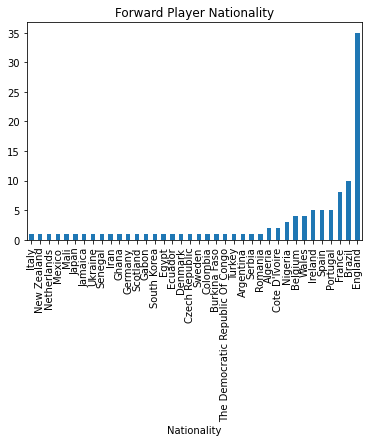

In [ ]:
df_striker.groupby('Nationality')['Name'].count().sort_values(ascending=True).plot(kind='bar')
plt.title('Forward Player Nationality')

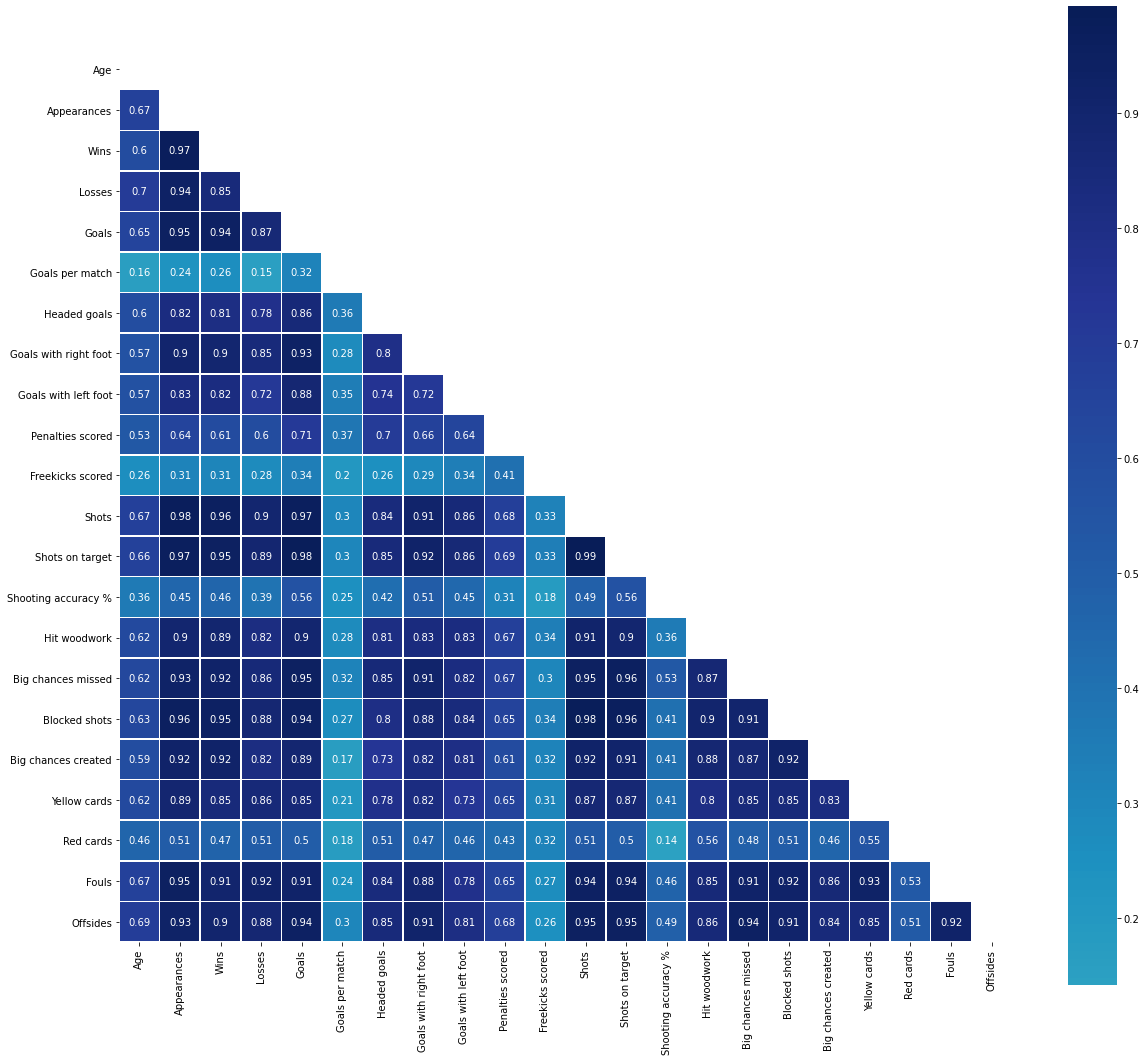

In [ ]:
corr = df_striker.drop(['Name', 'Club','Position','Nationality'], axis=1).corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 18))

sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

In [ ]:
df_striker.describe()

,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Blocked shots,Big chances created,Yellow cards,Red cards,Fouls,Offsides
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,25.372727,77.381818,32.654545,26.972727,21.481818,0.919455,3.527273,11.890909,5.954545,1.590909,0.172727,149.009091,59.890909,0.331091,4.281818,17.745455,35.800000,11.945455,6.418182,0.336364,69.018182,33.790909
std,4.248819,79.074112,40.805746,27.237811,30.948531,2.812830,6.017877,19.447575,10.762990,4.039474,0.618656,189.935406,78.983490,0.150585,6.038306,24.156005,45.334799,16.703478,8.588858,0.707461,85.580798,47.219786
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.250000,19.000000,4.000000,8.250000,1.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.000000,0.292500,0.000000,1.000000,3.000000,0.250000,0.000000,0.000000,9.000000,3.000000
50%,25.000000,39.500000,14.000000,16.500000,6.000000,0.210000,0.500000,4.000000,2.000000,0.000000,0.000000,51.000000,20.500000,0.380000,2.000000,7.000000,14.000000,5.000000,3.000000,0.000000,31.000000,13.000000
75%,28.750000,119.000000,43.000000,43.750000,36.750000,0.337500,4.000000,14.750000,7.000000,1.000000,0.000000,226.750000,92.500000,0.430000,7.000000,26.000000,53.000000,15.750000,9.000000,0.000000,90.750000,48.250000
max,34.000000,346.000000,177.000000,143.000000,180.000000,19.000000,31.000000,127.000000,63.000000,26.000000,4.000000,996.000000,411.000000,0.540000,34.000000,126.000000,230.000000,80.000000,35.000000,3.000000,395.000000,203.000000


In [ ]:
df_striker.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 23 to 570
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   110 non-null    object 
 1   Club                   110 non-null    object 
 2   Position               110 non-null    object 
 3   Nationality            110 non-null    object 
 4   Age                    110 non-null    float64
 5   Appearances            110 non-null    int64  
 6   Wins                   110 non-null    int64  
 7   Losses                 110 non-null    int64  
 8   Goals                  110 non-null    int64  
 9   Goals per match        110 non-null    float64
 10  Headed goals           110 non-null    float64
 11  Goals with right foot  110 non-null    float64
 12  Goals with left foot   110 non-null    float64
 13  Penalties scored       110 non-null    float64
 14  Freekicks scored       110 non-null    float64
 15  Shots

Text(0.5, 1.0, 'Top 10 Goal Scorer in PL')

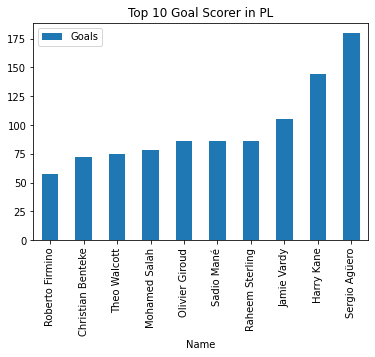

In [ ]:
# Filter Top 10 Player
df_striker.nlargest(10,'Goals').sort_values(by='Goals').plot(x='Name',y='Goals',kind='bar')
plt.title("Top 10 Goal Scorer in PL")

Text(0.5, 1.0, 'Top 10 Player with most shots in PL')

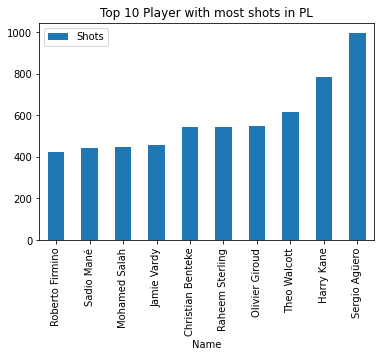

In [ ]:
df_striker.nlargest(10,'Goals').sort_values(by='Shots').plot(x='Name',y='Shots',kind='bar')
plt.title("Top 10 Player with most shots in PL")

In [ ]:
# exclude the object data for clustering
df_striker_x = df_striker.select_dtypes(exclude=['object'])

In [ ]:
# change all data types to float64
X = df_striker_x.astype('float64')

In [ ]:
# searching the best clusters
from sklearn.cluster import KMeans

clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

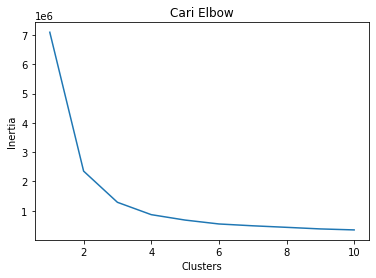

In [ ]:
plt.plot(list(range(1,11)),clusters)
plt.title("Cari Elbow")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


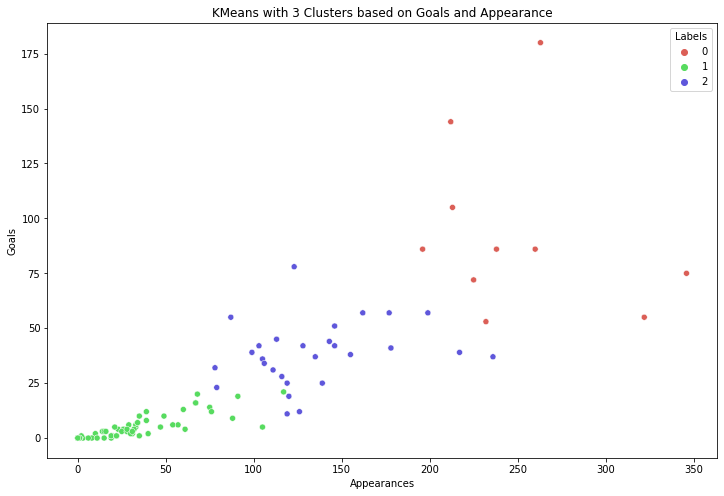

In [ ]:
# KMeans with 3 cluster
km = KMeans(n_clusters=3).fit(X)

X['Labels'] = km.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Appearances'], X['Goals'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters based on Goals and Appearance')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


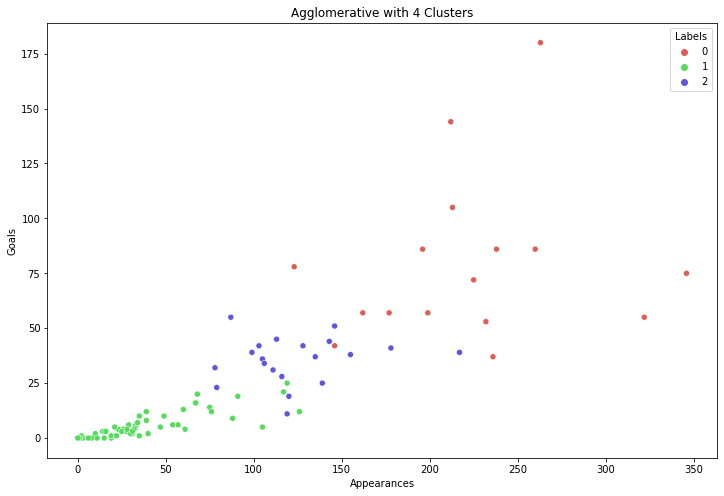

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Appearances'], X['Goals'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 4 Clusters')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Agglomerative with 3 Clusters')

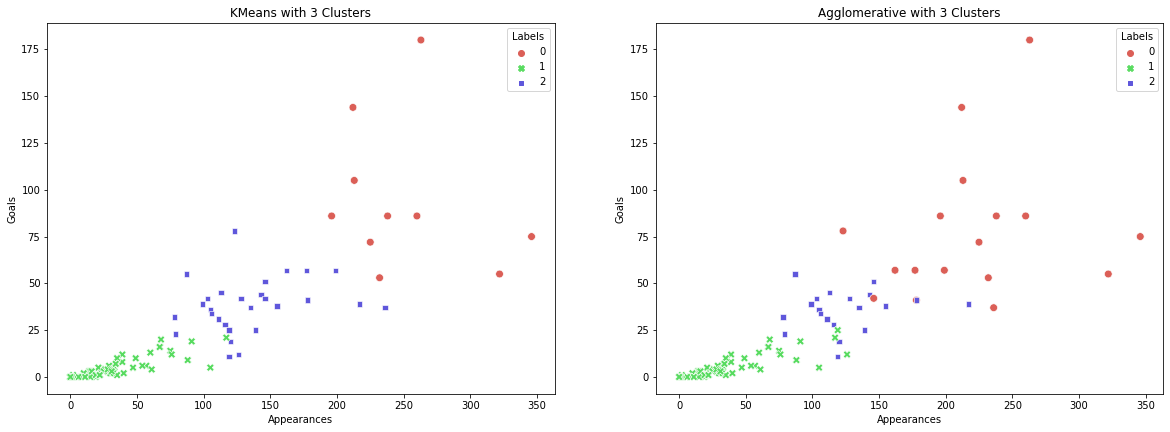

In [ ]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=3).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(X['Appearances'], X['Goals'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 3), s=60, ax=ax)
ax.set_title('KMeans with 3 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['Appearances'], X['Goals'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 3), s=60, ax=ax)
ax.set_title('Agglomerative with 3 Clusters')

In [ ]:
X.head()

,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Blocked shots,Big chances created,Yellow cards,Red cards,Fouls,Offsides,Labels
23,29.0,99.0,46.0,28.0,39.0,0.39,4.0,30.0,5.0,2.0,1.0,204.0,93.0,0.46,4.0,31.0,44.0,15.0,11.0,0.0,127.0,62.0,2
24,31.0,87.0,43.0,25.0,55.0,0.63,3.0,44.0,8.0,7.0,1.0,222.0,105.0,0.47,8.0,39.0,52.0,17.0,4.0,1.0,30.0,55.0,2
25,25.0,33.0,15.0,9.0,5.0,0.15,0.0,0.0,5.0,1.0,0.0,51.0,18.0,0.35,3.0,2.0,14.0,8.0,4.0,0.0,14.0,4.0,1
26,20.0,20.0,10.0,5.0,1.0,0.05,0.0,1.0,0.0,0.0,0.0,13.0,4.0,0.31,0.0,0.0,5.0,0.0,1.0,0.0,8.0,4.0,1
27,21.0,23.0,12.0,8.0,4.0,0.17,0.0,2.0,2.0,0.0,0.0,20.0,8.0,0.40,4.0,3.0,4.0,1.0,0.0,1.0,18.0,5.0,1
